#Stock Price and Revenue Analysis Dashboard

## Introduction

Stock prices reflect how the market values a company, while revenue represents the actual financial performance of the business.
This project uses Python to clean up quarterly revenue and stock data, eventually pulling it all into a dashboard to visualize how these trends have shifted over time.


## Objectives

The objectives of this project are:

* To analyze stock price and revenue data of a company
* To clean and preprocess real-world financial datasets
* Build a dashboard that makes it easy to spot trends at a glance.

## Methods

The following steps were followed in this project:
1. Stock price data was collected from publicly available financial sources
2. An attempt was made to scrape the revenue data directly from the web, but the site's security blocked my automated requests.
3. To overcome that Revenue tables were manually extracted and converted into structured CSV format
5. The data was cleaned, filtered, and prepared for analysis
6. A dashboard-style visualization was created using Python

## Libraries Used

- pandas for data manipulation and analysis
- matplotlib for data visualization
- yfinance for retrieving historical stock price data from Yahoo Finance


In [ ]:
!pip install yfinance
!pip install matplotlib

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [36]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Tesla Stock Analysis**

In [37]:
tesla = yf.Ticker("TSLA")

In [38]:
# Fetch historical stock data for Tesla
tesla_data = tesla.history(period="max")
# Reset index so Date becomes a column for analysis
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [39]:
# Convert Date and Close to proper format for plotting
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['Close'] = tesla_data['Close'].astype(float)

In [40]:
tesla_revenue = pd.read_csv("tesla_revenue.csv")
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [41]:
# Convert Date and Close to proper format for plotting
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

In [42]:
# Filter stock and revenue data to keep a common time period for comparison
tesla_stock_filtered = tesla_data[tesla_data['Date'] <= '2022-09-30']
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= '2022-09-30']

**GameStop Stock Analysis**

In [43]:
gamestop = yf.Ticker("GME")

In [44]:
# Fetch historical stock data for GameStop
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [45]:
# Convert Date and Close to proper format for plotting
gamestop_data['Date'] = pd.to_datetime(gamestop_data['Date'])
gamestop_data['Close'] = gamestop_data['Close'].astype(float)

In [46]:
gamestop_revenue = pd.read_csv("gamestop_revenue.csv")
gamestop_revenue.head()

,Date,Revenue
0,2025-10-31,821
1,2025-07-31,972
2,2025-04-30,732
3,2025-01-31,1283
4,2024-10-31,860


In [47]:
# Convert Date and Close to proper format for plotting
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].astype(float)

In [48]:
# Filter stock and revenue data to keep a common time period for comparison
gamestop_stock_filtered = gamestop_data[gamestop_data['Date'] <= '2022-10-31']
gamestop_revenue_filtered = gamestop_revenue[gamestop_revenue['Date'] <= '2022-10-31']

# Dashboard Visualization

The following function creates a dashboard with two graphs.
The upper graph shows the stock price trend, and the lower graph shows the revenue trend.

In [49]:
def make_graph(stock_df, revenue_df, company):

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock Price
    axes[0].plot(stock_df['Date'], stock_df['Close'], label='Stock Price')
    axes[0].set_title(f"{company} Stock Price")
    axes[0].set_ylabel("Price (USD)")
    axes[0].legend()
    axes[0].grid(True)

    # Revenue
    axes[1].plot(revenue_df['Date'], revenue_df['Revenue'], label='Revenue')
    axes[1].set_title(f"{company} Revenue")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Revenue (Million USD)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

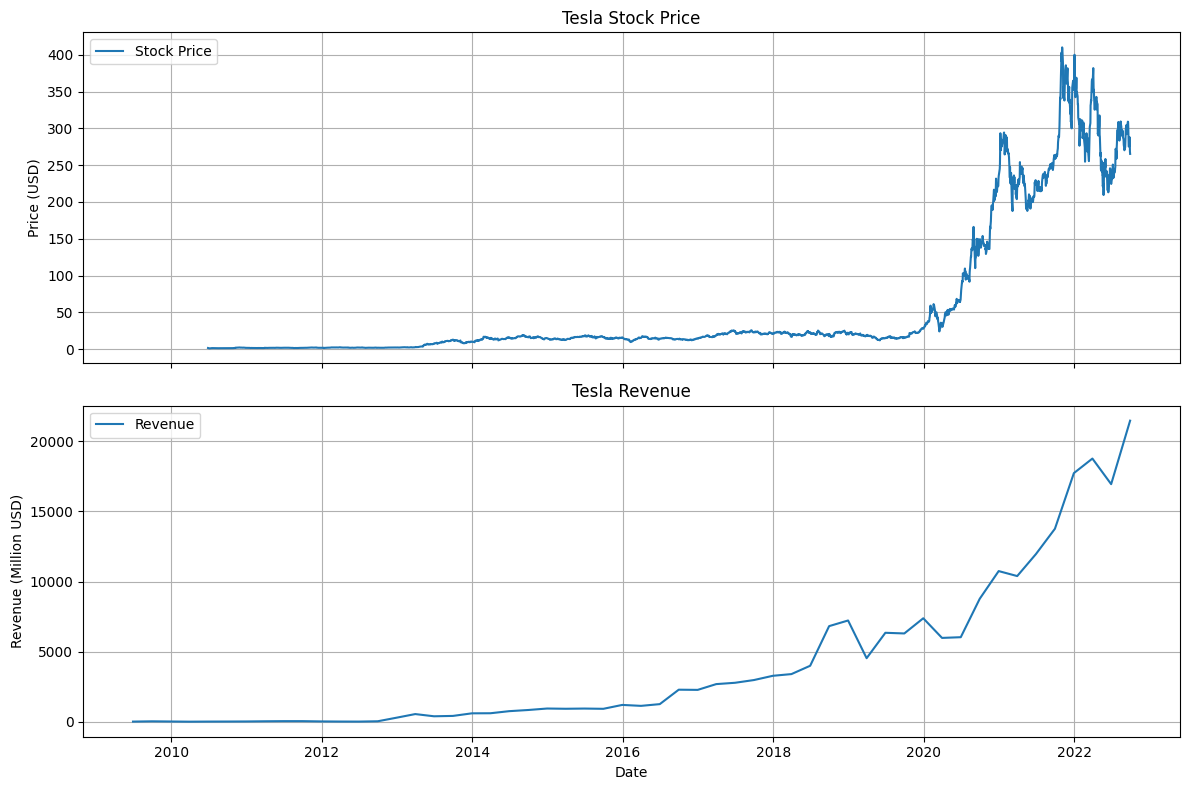

In [50]:
make_graph(tesla_stock_filtered,tesla_revenue_filtered,"Tesla")

## Observations (Tesla)

- Tesla’s stock price shows strong long-term growth with high volatility
- Revenue demonstrates a consistent upward trend over time
- In several periods, stock price movements are more aggressive than revenue growth

This suggests that market expectations and future outlook play a significant role in Tesla’s valuation

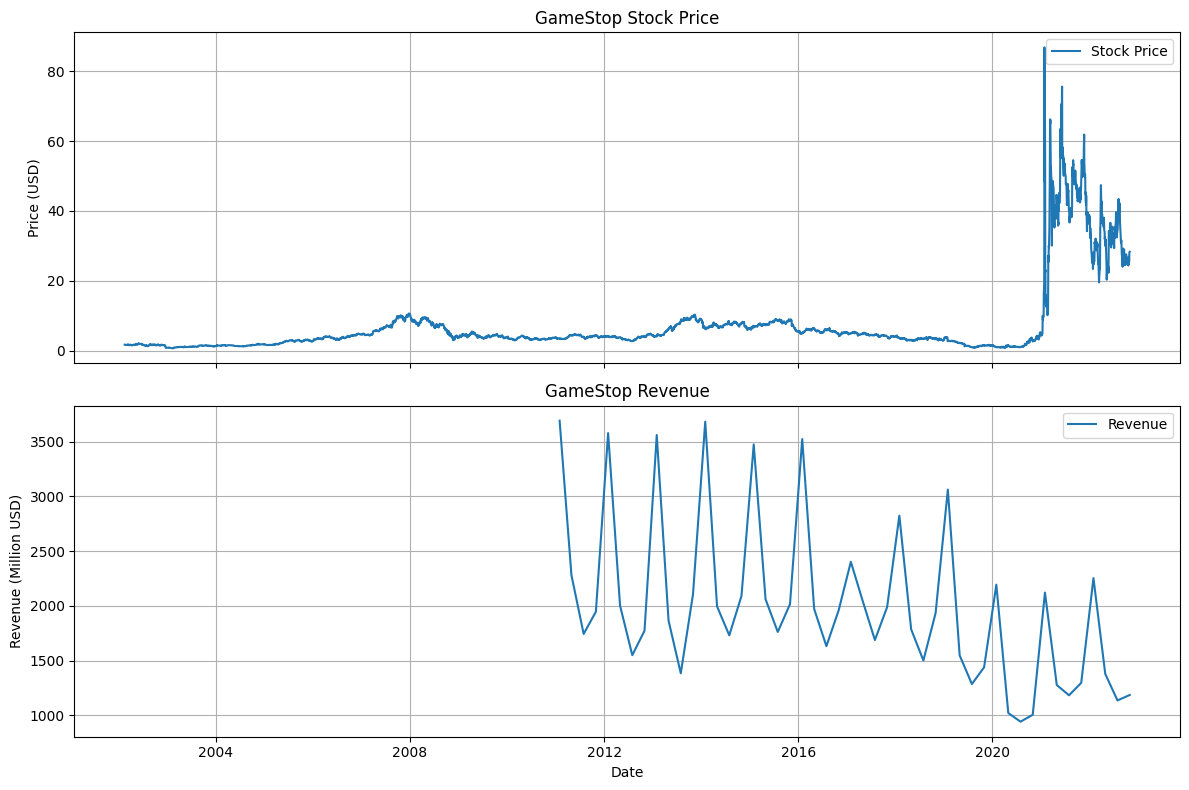

In [51]:
make_graph(gamestop_stock_filtered,gamestop_revenue_filtered,"GameStop")

Observations (GameStop)

* GameStop’s stock price stayed low for many years but suddenly increased and became unstable around 2020–2021

* Revenue shows ups and downs each year but overall does not grow much

* The sharp rise in stock price does not match the revenue pattern

* This shows that the stock price changed mainly because of how people were buying and selling the stock, not because the company was earning more


## Conclusion

In this project, stock price and revenue data for Tesla and GameStop were analyzed using Python.
The data was collected, cleaned, and compared to understand how stock prices relate to company revenue.

The analysis shows that stock prices do not always move according to revenue.
Tesla’s stock price mostly follows its business growth, while GameStop’s stock price shows sudden changes that do not match its revenue.

This project helped me understand how to analyze financial data, create visualizations, and see the difference between company performance and stock market behavior.